## Diabetes Prediction Using Machine Learning

### Problem Overview:-

The goal of this project is to develop a smooth process for predicting diabetes by creating a machine learning model that evaluates various health parameters. The web application will collect user input, run the data through the model, and display the prediction results on a separate page.

In [4]:
# Import modules
import numpy as np                      
import pandas as pd                     
import seaborn as sns                   
import matplotlib.pyplot as plt         
import warnings                         
warnings.filterwarnings("ignore")

In [5]:
# Loading the dataset
df=pd.read_csv('Diabetes_Data.csv')

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [7]:
# Returns an object with all of the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Returns different datatypes for each columns 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Returns basic statistics on numeric columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [11]:
 df=df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

In [12]:
# Check for the null values 
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [13]:
for i in df:
    print(df[i].value_counts())
    print()

Pregnancies
1     356
0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: count, dtype: int64

Glucose
99     49
100    44
102    39
129    37
112    36
       ..
67      2
191     2
44      2
62      2
177     2
Name: count, Length: 136, dtype: int64

BloodPressure
74     145
70     144
78     128
68     125
64     120
72     118
80      98
62      94
76      93
60      92
0       90
82      83
88      67
66      65
84      61
90      55
58      54
86      53
50      31
54      31
56      31
52      29
75      20
65      19
94      18
85      14
48      13
92      12
44      11
106      9
100      9
96       8
98       8
110      7
46       6
104      5
108      5
55       4
61       4
30       3
122      3
102      3
114      3
38       3
95       2
24       2
40       2
Name: count, dtype: int64

SkinThickness
0      573
32      83
30      75
23      60
27      58
28    

In [14]:
df['Glucose'].replace(0,np.nan,inplace=True)
df['BloodPressure'].replace(0,np.nan,inplace=True)
df['SkinThickness'].replace(0,np.nan,inplace=True)
df['Insulin'].replace(0,np.nan,inplace=True)
df['BMI'].replace(0,np.nan,inplace=True)

In [15]:
df.isna().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

In [16]:
df.isna().sum()/len(df)*100

Pregnancies       0.00
Glucose           0.65
BloodPressure     4.50
SkinThickness    28.65
Insulin          47.80
BMI               1.40
DPF               0.00
Age               0.00
Outcome           0.00
dtype: float64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DPF'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

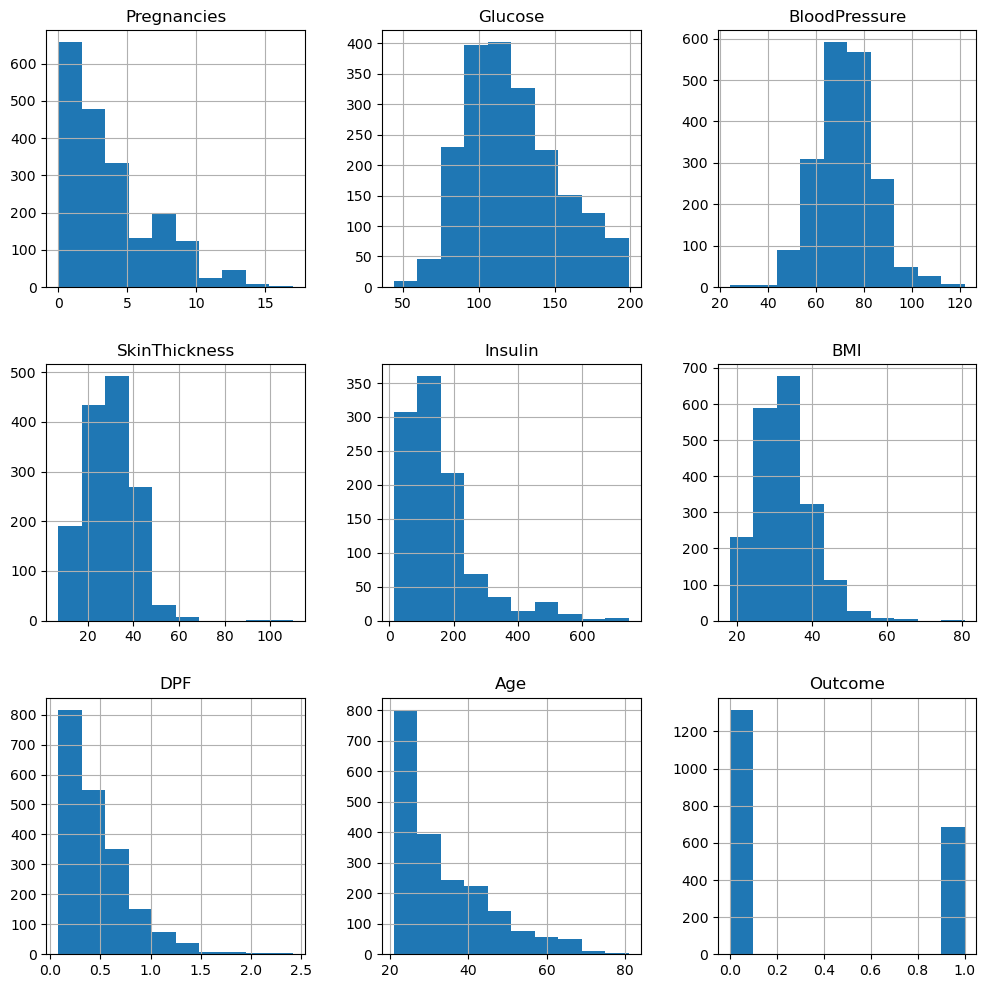

In [17]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
df.hist(figsize=(12,12))

In [18]:
# Now we replacing NaN value by mean, median depending upon distribution.
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DPF'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

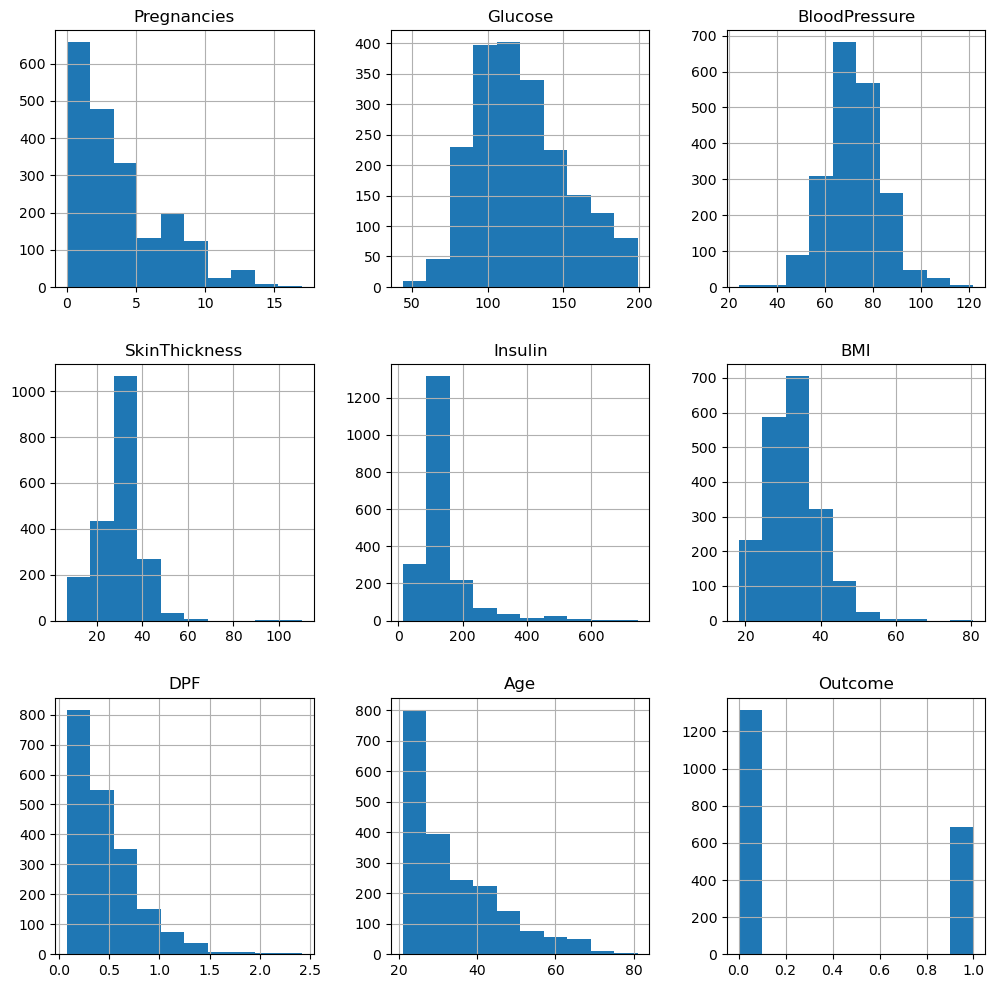

In [19]:
# Plotting histogram of dataset after replacing NaN values
df.hist(figsize=(12,12))

In [20]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns
new_df=df

In [22]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

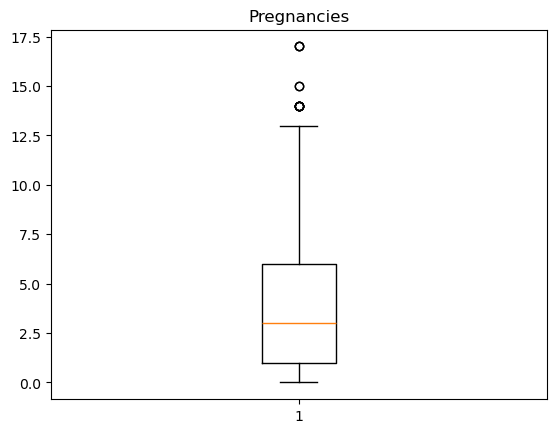

Q1= 1.0
Q2= 3.0
Q3= 6.0
IQR= 5.0
Upper_Whisker= 13.5
Lower_Whisker= -6.5


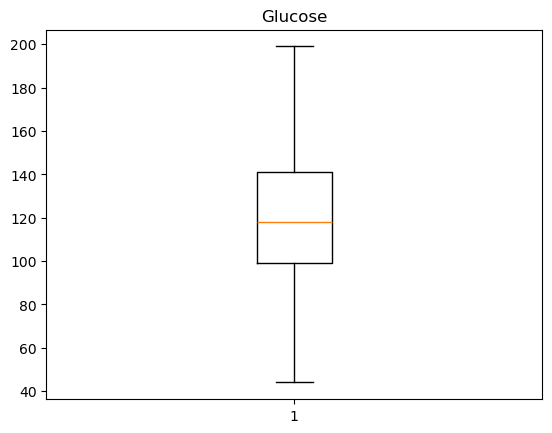

Q1= 99.0
Q2= 118.0
Q3= 141.0
IQR= 42.0
Upper_Whisker= 204.0
Lower_Whisker= 36.0


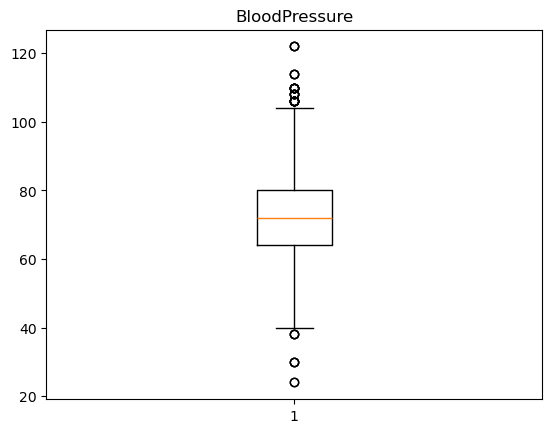

Q1= 64.0
Q2= 72.0
Q3= 80.0
IQR= 16.0
Upper_Whisker= 104.0
Lower_Whisker= 40.0


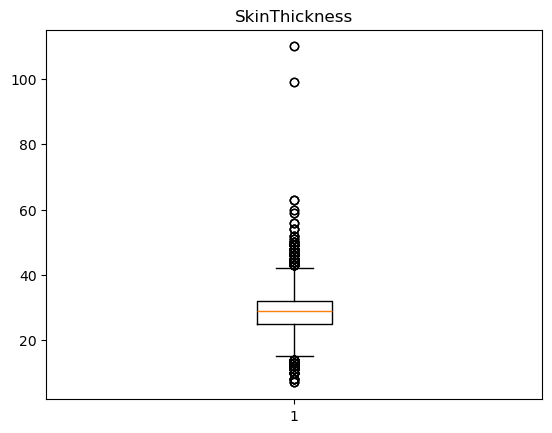

Q1= 25.0
Q2= 29.0
Q3= 32.0
IQR= 7.0
Upper_Whisker= 42.5
Lower_Whisker= 14.5


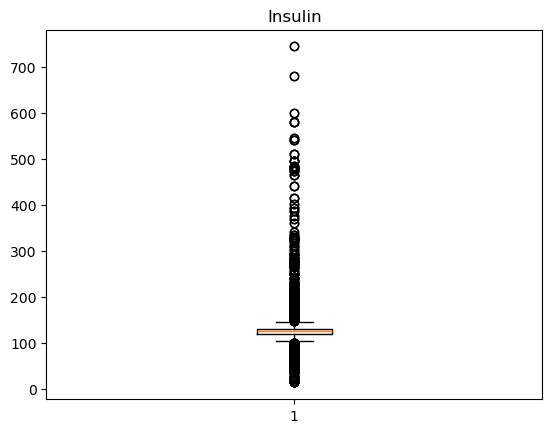

Q1= 120.0
Q2= 126.0
Q3= 130.0
IQR= 10.0
Upper_Whisker= 145.0
Lower_Whisker= 105.0


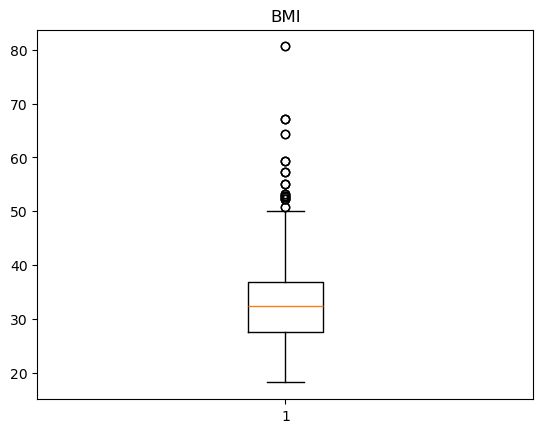

Q1= 27.6
Q2= 32.4
Q3= 36.8
IQR= 9.199999999999996
Upper_Whisker= 50.599999999999994
Lower_Whisker= 13.800000000000008


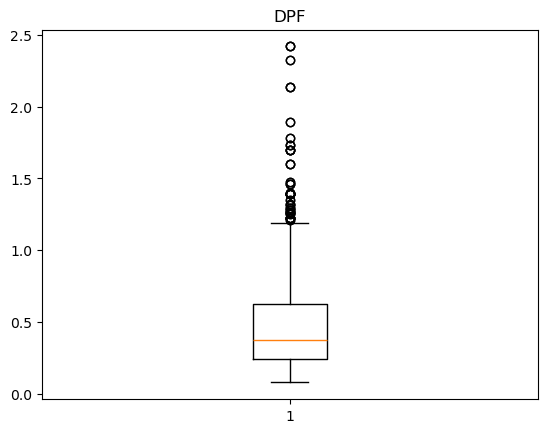

Q1= 0.244
Q2= 0.376
Q3= 0.624
IQR= 0.38
Upper_Whisker= 1.194
Lower_Whisker= -0.32600000000000007


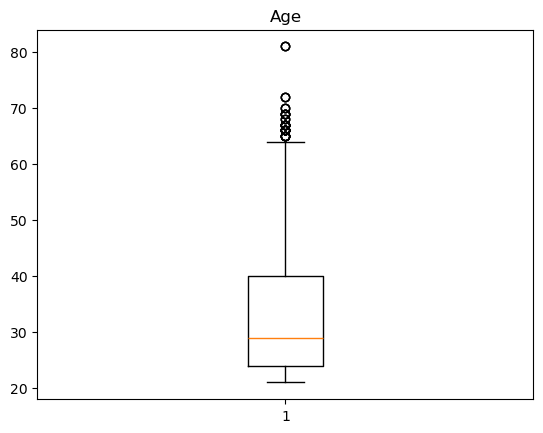

Q1= 24.0
Q2= 29.0
Q3= 40.0
IQR= 16.0
Upper_Whisker= 64.0
Lower_Whisker= 0.0


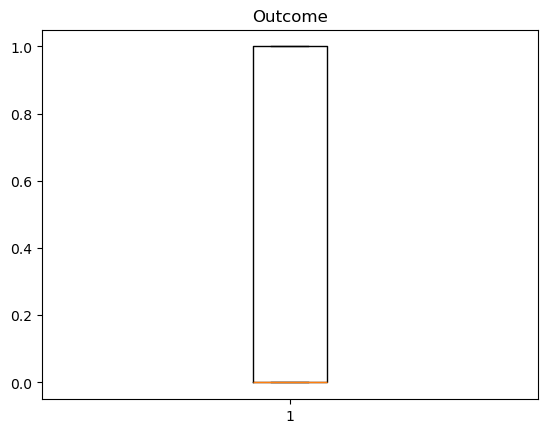

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
Upper_Whisker= 2.5
Lower_Whisker= -1.5


In [23]:
## Outliers
for i in new_df:
    plt.figure()
    plt.boxplot(new_df[i])
    plt.title(i)
    plt.show()    
    q1=new_df[i].quantile(0.25)
    q3=new_df[i].quantile(0.75)
    q2=new_df[i].quantile(0.50)
    iqr=q3-q1
    upper_tail=q3+1.5*iqr
    lower_tail=q1-1.5*iqr
    print("Q1=",q1)
    print("Q2=",q2)
    print("Q3=",q3)
    print("IQR=",iqr)
    print("Upper_Whisker=",upper_tail)
    print("Lower_Whisker=",lower_tail)

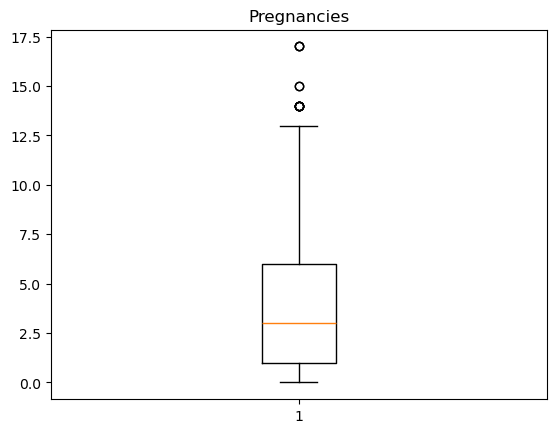

Q1= 1.0
Q2= 3.0
Q3= 6.0
IQR= 5.0
Upper_Whisker= 13.5
Lower_Whisker= -6.5


In [24]:
## Pregnancies
plt.figure()
plt.boxplot(new_df['Pregnancies'])
plt.title('Pregnancies')
plt.show()    
q1=new_df['Pregnancies'].quantile(0.25)
q3=new_df['Pregnancies'].quantile(0.75)
q2=new_df['Pregnancies'].quantile(0.50)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("Upper_Whisker=",upper_tail)
print("Lower_Whisker=",lower_tail)

In [25]:
df.loc[new_df['Pregnancies']>upper_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,126.0,33.6,0.212,38,1
768,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
925,14,175.0,62.0,30.0,126.0,33.6,0.212,38,1
1225,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
1317,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
1456,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
1514,14,175.0,62.0,30.0,126.0,33.6,0.212,38,1


In [26]:
df.loc[new_df['Pregnancies']>upper_tail,'Pregnancies']=upper_tail

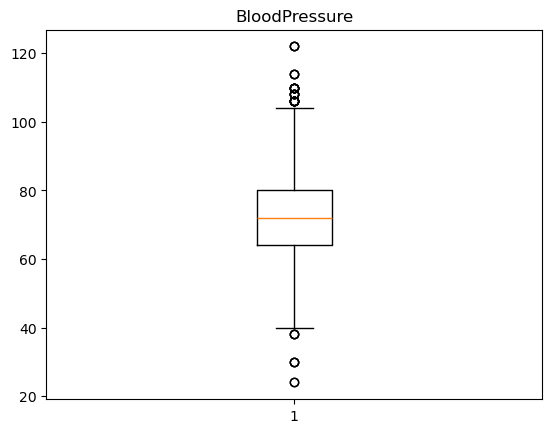

Q1= 64.0
Q2= 72.0
Q3= 80.0
IQR= 16.0
Upper_Whisker= 104.0
Lower_Whisker= 40.0


In [27]:
## BloodPressure
plt.figure()
plt.boxplot(new_df['BloodPressure'])
plt.title('BloodPressure')
plt.show()    
q1=new_df['BloodPressure'].quantile(0.25)
q3=new_df['BloodPressure'].quantile(0.75)
q2=new_df['BloodPressure'].quantile(0.50)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("Upper_Whisker=",upper_tail)
print("Lower_Whisker=",lower_tail)

In [28]:
df.loc[new_df['BloodPressure']>upper_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
43,9.0,171.0,110.0,24.0,240.0,45.4,0.721,54,1
84,5.0,137.0,108.0,29.0,126.0,48.8,0.227,37,1
106,1.0,96.0,122.0,29.0,126.0,22.4,0.207,27,0
177,0.0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
362,5.0,103.0,108.0,37.0,126.0,39.2,0.305,65,0
549,4.0,189.0,110.0,31.0,126.0,28.5,0.680,37,0
658,11.0,127.0,106.0,29.0,126.0,39.0,0.190,51,0
662,8.0,167.0,106.0,46.0,231.0,37.6,0.165,43,1
672,10.0,68.0,106.0,23.0,49.0,35.5,0.285,47,0
691,13.0,158.0,114.0,29.0,126.0,42.3,0.257,44,1


In [29]:
df.loc[new_df['BloodPressure']<lower_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
125,1.0,88.0,30.0,42.0,99.0,55.0,0.496,26,1
597,1.0,89.0,24.0,19.0,25.0,27.8,0.559,21,0
599,1.0,109.0,38.0,18.0,120.0,23.1,0.407,26,0
1054,1.0,89.0,24.0,19.0,25.0,27.8,0.559,21,0
1056,1.0,109.0,38.0,18.0,120.0,23.1,0.407,26,0
1283,1.0,88.0,30.0,42.0,99.0,55.0,0.496,26,1
1687,1.0,109.0,38.0,18.0,120.0,23.1,0.407,26,0
1946,1.0,88.0,30.0,42.0,99.0,55.0,0.496,26,1


In [30]:
df.loc[new_df['BloodPressure']>upper_tail,'BloodPressure']=upper_tail 
df.loc[new_df['BloodPressure']<lower_tail,'BloodPressure']=lower_tail

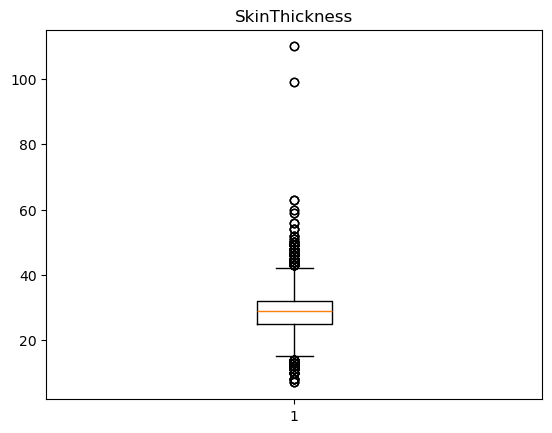

Q1= 25.0
Q2= 29.0
Q3= 32.0
IQR= 7.0
Upper_Whisker= 42.5
Lower_Whisker= 14.5


In [31]:
## SkinThickness
plt.figure()
plt.boxplot(new_df['SkinThickness'])
plt.title('SkinThickness')
plt.show()    
q1=new_df['SkinThickness'].quantile(0.25)
q3=new_df['SkinThickness'].quantile(0.75)
q2=new_df['SkinThickness'].quantile(0.50)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("Upper_Whisker=",upper_tail)
print("Lower_Whisker=",lower_tail)

In [32]:
df.loc[new_df['SkinThickness']>upper_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
39,4.0,111.0,72.0,47.0,207.0,37.1,1.390,56,1
57,0.0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
86,13.0,106.0,72.0,54.0,126.0,36.6,0.178,45,0
99,1.0,122.0,90.0,51.0,220.0,49.7,0.325,31,1
120,0.0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
...,...,...,...,...,...,...,...,...,...
1920,1.0,122.0,90.0,51.0,220.0,49.7,0.325,31,1
1941,0.0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
1971,1.0,136.0,74.0,50.0,204.0,37.4,0.399,24,0
1976,7.0,152.0,88.0,44.0,126.0,50.0,0.337,36,1


In [33]:
df.loc[new_df['SkinThickness']<lower_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
50,1.0,103.0,80.0,11.0,82.0,19.4,0.491,22,0
55,1.0,73.0,50.0,10.0,126.0,23.0,0.248,21,0
68,1.0,95.0,66.0,13.0,38.0,19.6,0.334,25,0
80,3.0,113.0,44.0,13.0,126.0,22.4,0.140,22,0
130,4.0,173.0,70.0,14.0,168.0,29.7,0.361,33,1
...,...,...,...,...,...,...,...,...,...
1889,1.0,95.0,66.0,13.0,38.0,19.6,0.334,25,0
1901,3.0,113.0,44.0,13.0,126.0,22.4,0.140,22,0
1951,4.0,173.0,70.0,14.0,168.0,29.7,0.361,33,1
1955,2.0,96.0,68.0,13.0,49.0,21.1,0.647,26,0


In [34]:
df.loc[new_df['SkinThickness']>upper_tail,'SkinThickness']=upper_tail 
df.loc[new_df['SkinThickness']<lower_tail,'SkinThickness']=lower_tail

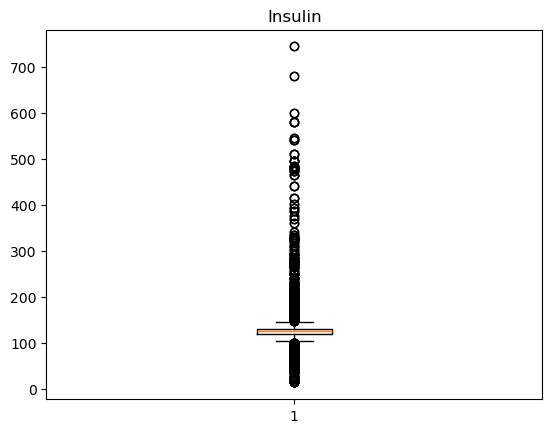

Q1= 120.0
Q2= 126.0
Q3= 130.0
IQR= 10.0
Upper_Whisker= 145.0
Lower_Whisker= 105.0


In [35]:
## Insulin
plt.figure()
plt.boxplot(new_df['Insulin'])
plt.title('Insulin')
plt.show()    
q1=new_df['Insulin'].quantile(0.25)
q3=new_df['Insulin'].quantile(0.75)
q2=new_df['Insulin'].quantile(0.50)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("Upper_Whisker=",upper_tail)
print("Lower_Whisker=",lower_tail)

In [36]:
df.loc[new_df['Insulin']>upper_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
3,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1.0,139.0,62.0,41.0,480.0,40.7,0.536,21,0
5,0.0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
17,6.0,154.0,74.0,32.0,193.0,29.3,0.839,39,0
25,1.0,130.0,60.0,23.0,170.0,28.6,0.692,21,0
...,...,...,...,...,...,...,...,...,...
1971,1.0,136.0,74.0,42.5,204.0,37.4,0.399,24,0
1973,9.0,156.0,86.0,28.0,155.0,34.3,1.189,42,1
1974,1.0,153.0,82.0,42.0,485.0,40.6,0.687,23,0
1983,0.0,114.0,80.0,34.0,285.0,44.2,0.167,27,0


In [37]:
df.loc[new_df['Insulin']<lower_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
8,2.0,83.0,65.0,28.0,66.0,36.8,0.629,24,0
15,2.0,81.0,72.0,15.0,76.0,30.1,0.547,25,0
18,2.0,117.0,90.0,19.0,71.0,25.2,0.313,21,0
21,7.0,94.0,64.0,25.0,79.0,33.3,0.738,41,0
24,0.0,180.0,90.0,26.0,90.0,36.5,0.314,35,1
...,...,...,...,...,...,...,...,...,...
1979,2.0,88.0,74.0,19.0,53.0,29.0,0.229,22,0
1990,3.0,111.0,90.0,14.5,78.0,28.4,0.495,29,0
1994,1.0,79.0,60.0,42.0,48.0,43.5,0.678,23,0
1995,2.0,75.0,64.0,24.0,55.0,29.7,0.370,33,0


In [38]:
df.loc[new_df['Insulin']>upper_tail,'Insulin']=upper_tail 
df.loc[new_df['Insulin']<lower_tail,'Insulin']=lower_tail

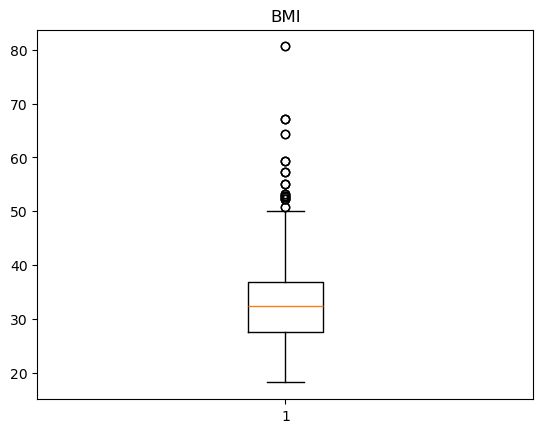

Q1= 27.6
Q2= 32.4
Q3= 36.8
IQR= 9.199999999999996
Upper_Whisker= 50.599999999999994
Lower_Whisker= 13.800000000000008


In [39]:
## BMI
plt.figure()
plt.boxplot(new_df['BMI'])
plt.title('BMI')
plt.show()    
q1=new_df['BMI'].quantile(0.25)
q3=new_df['BMI'].quantile(0.75)
q2=new_df['BMI'].quantile(0.50)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("Upper_Whisker=",upper_tail)
print("Lower_Whisker=",lower_tail)

In [40]:
df.loc[new_df['BMI']>upper_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
120,0.0,162.0,76.000000,42.5,105.0,53.2,0.759,25,1
125,1.0,88.0,40.000000,42.0,105.0,55.0,0.496,26,1
177,0.0,129.0,104.000000,42.5,130.0,67.1,0.319,26,1
193,11.0,135.0,72.403665,29.0,126.0,52.3,0.578,40,1
247,0.0,165.0,90.000000,33.0,145.0,52.3,0.427,23,0
303,5.0,115.0,98.000000,29.0,126.0,52.9,0.209,28,1
445,0.0,180.0,78.000000,42.5,105.0,59.4,2.420,25,1
673,3.0,123.0,100.000000,35.0,145.0,57.3,0.880,22,0
773,5.0,115.0,98.000000,29.0,126.0,52.9,0.209,28,1
915,0.0,180.0,78.000000,42.5,105.0,59.4,2.420,25,1


In [41]:
df.loc[new_df['BMI']>upper_tail,'BMI']=upper_tail 

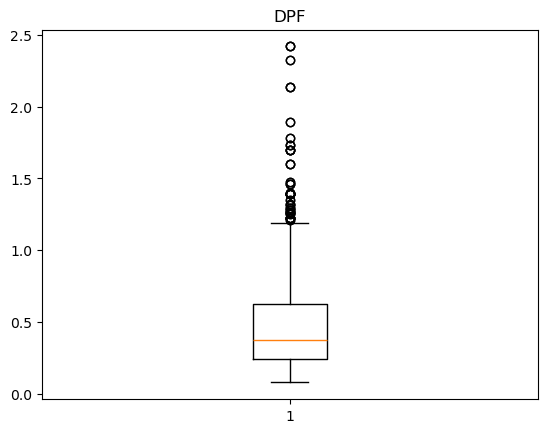

Q1= 0.244
Q2= 0.376
Q3= 0.624
IQR= 0.38
Upper_Whisker= 1.194
Lower_Whisker= -0.32600000000000007


In [42]:
## DPF
plt.figure()
plt.boxplot(new_df['DPF'])
plt.title('DPF')
plt.show()    
q1=new_df['DPF'].quantile(0.25)
q3=new_df['DPF'].quantile(0.75)
q2=new_df['DPF'].quantile(0.50)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("Upper_Whisker=",upper_tail)
print("Lower_Whisker=",lower_tail)

In [43]:
df.loc[new_df['DPF']>upper_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
39,4.0,111.0,72.0,42.5,145.0,37.1,1.390,56,1
45,0.0,180.0,66.0,39.0,126.0,42.0,1.893,25,1
58,0.0,146.0,82.0,29.0,126.0,40.5,1.781,44,0
100,1.0,163.0,72.0,29.0,126.0,39.0,1.222,33,1
147,2.0,106.0,64.0,35.0,119.0,30.5,1.400,34,0
...,...,...,...,...,...,...,...,...,...
1860,4.0,111.0,72.0,42.5,145.0,37.1,1.390,56,1
1866,0.0,180.0,66.0,39.0,126.0,42.0,1.893,25,1
1879,0.0,146.0,82.0,29.0,126.0,40.5,1.781,44,0
1921,1.0,163.0,72.0,29.0,126.0,39.0,1.222,33,1


In [44]:
df.loc[new_df['DPF']>upper_tail,'DPF']=upper_tail 

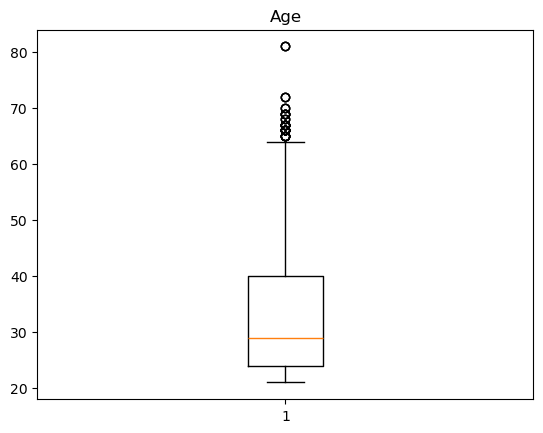

Q1= 24.0
Q2= 29.0
Q3= 40.0
IQR= 16.0
Upper_Whisker= 64.0
Lower_Whisker= 0.0


In [45]:
## Age 
plt.figure()
plt.boxplot(new_df['Age'])
plt.title('Age')
plt.show()    
q1=new_df['Age'].quantile(0.25)
q3=new_df['Age'].quantile(0.75)
q2=new_df['Age'].quantile(0.50)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("Upper_Whisker=",upper_tail)
print("Lower_Whisker=",lower_tail)

In [46]:
df.loc[new_df['Age']>upper_tail]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
7,8.0,194.0,80.000000,29.0,126.0,26.1,0.551,67,0
13,6.0,166.0,74.000000,29.0,126.0,26.6,0.304,66,0
123,5.0,132.0,80.000000,29.0,126.0,26.8,0.186,69,0
148,5.0,147.0,78.000000,29.0,126.0,33.7,0.218,65,0
221,2.0,158.0,90.000000,29.0,126.0,31.6,0.805,66,1
294,0.0,161.0,50.000000,29.0,126.0,21.9,0.254,65,0
362,5.0,103.0,104.000000,37.0,126.0,39.2,0.305,65,0
363,4.0,146.0,78.000000,29.0,126.0,38.5,0.520,67,1
453,2.0,119.0,72.403665,29.0,126.0,19.6,0.832,72,0
459,9.0,134.0,74.000000,33.0,105.0,25.9,0.460,81,0


In [47]:
df.loc[new_df['Age']>upper_tail,'Age']=upper_tail 

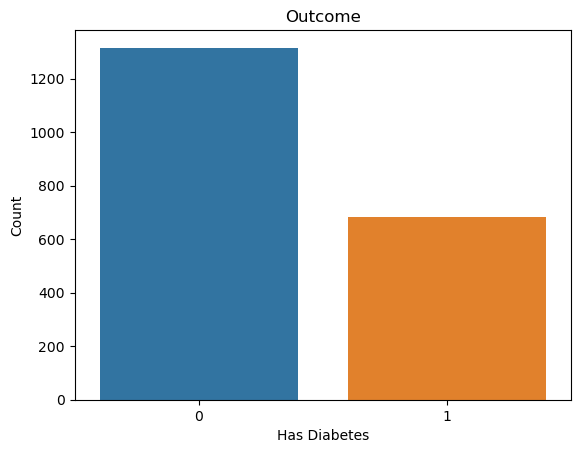

In [48]:
palette=sns.color_palette()
sns.countplot(x=df['Outcome'],palette=palette)
plt.title('Outcome')
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

In [49]:
a=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']

In [50]:
from scipy.stats import skew

In [51]:
for i in a:                                                
    print(i,skew(df[i]))

Pregnancies 0.9258596275685791
Glucose 0.5125888864042195
BloodPressure 0.13133524458202117
SkinThickness -0.054137897213139476
Insulin -0.11308410078038392
BMI 0.3976266405729702
DPF 1.0144845564188727
Age 1.0608531065337412


In [52]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [53]:
for i in a:
    df[i]=scale.fit_transform(df[[i]])

In [54]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,0.148148,0.606452,0.343750,0.732143,0.525,0.475309,0.043907,0.604651,1
1,0.000000,0.258065,0.656250,0.589286,0.500,0.617284,0.138889,0.046512,0
2,0.000000,0.651613,0.506307,0.517857,0.525,0.802469,0.494624,0.232558,1
3,0.000000,0.587097,0.437500,0.982143,1.000,0.743827,0.257168,0.069767,1
4,0.074074,0.612903,0.343750,0.946429,1.000,0.694444,0.410394,0.000000,0
...,...,...,...,...,...,...,...,...,...
1995,0.148148,0.200000,0.375000,0.339286,0.000,0.354938,0.261649,0.279070,0
1996,0.592593,0.870968,0.500000,0.982143,0.625,0.447531,0.574373,0.348837,1
1997,0.444444,0.264516,0.593750,0.517857,0.525,0.401235,0.272401,0.488372,0
1998,0.000000,0.548387,1.000000,1.000000,0.625,1.000000,0.215950,0.116279,1


In [55]:
b=df.corr()

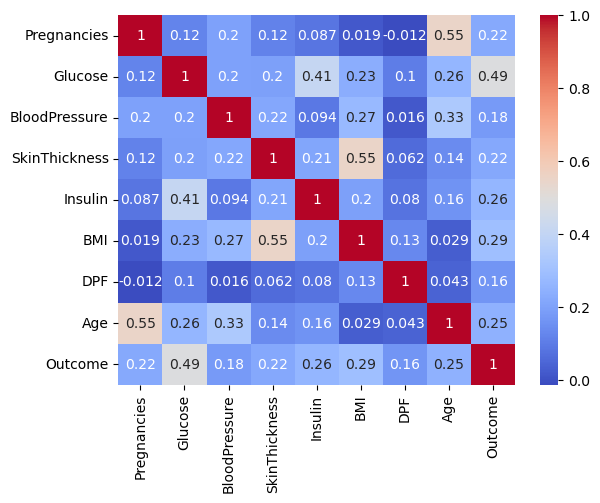

In [56]:
plt.figure()
sns.heatmap(b,annot=True,cmap='coolwarm')
plt.show()

In [57]:
x = df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## 1) Logistic Regression Model:-

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
# Hyperparameter Tuning
lr_hyperparameter= {'C': [0.01, 0.1, 1, 10, 100]}  # Inverse of regularization strength

In [62]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [63]:
lr_grid_search=GridSearchCV(estimator=lr_model,param_grid=lr_hyperparameter,cv=5)
lr_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [64]:
lr_best_params=lr_grid_search.best_params_
print("Best Parameters:", lr_best_params)

Best Parameters: {'C': 100}


In [65]:
best_lr_model=lr_grid_search.best_estimator_
best_lr_model

LogisticRegression(C=100)

In [66]:
y_pred_lr=best_lr_model.predict(x_test)

In [67]:
accuracy_lr=accuracy_score(y_test,y_pred_lr)*100
print("Accuracy of Logistic Regression:",accuracy_lr)

Accuracy of Logistic Regression: 78.0


In [68]:
report_lr=classification_report(y_test,y_pred_lr)
print("Classification Report of Logistic Regression:\n",report_lr)

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       253
           1       0.77      0.57      0.66       147

    accuracy                           0.78       400
   macro avg       0.78      0.74      0.75       400
weighted avg       0.78      0.78      0.77       400



In [69]:
matrix_lr=confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix of Logistic Regression:\n",matrix_lr)

Confusion Matrix of Logistic Regression:
 [[228  25]
 [ 63  84]]


## 2) Decision Tree Model:-

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [72]:
# Hyperparameter Tuning
dt_hyperparameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15]}

In [73]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
dt_grid_search=GridSearchCV(estimator=dt_model,param_grid=dt_hyperparameter,cv=5)
dt_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15]})

In [75]:
dt_best_params=dt_grid_search.best_params_
print("Best Parameters:",dt_best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15}


In [76]:
best_dt_model=dt_grid_search.best_estimator_
best_dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [77]:
y_pred_dt=best_dt_model.predict(x_test)

In [78]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)*100
print("Accuracy of Decision Tree Classifier:",accuracy_dt)

Accuracy of Decision Tree Classifier: 98.0


In [79]:
report_dt=classification_report(y_test,y_pred_dt)
print("Classification Report of Decision Tree Classifier:\n",report_dt)

Classification Report of Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       253
           1       0.96      0.99      0.97       147

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [80]:
matrix_dt=confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix of Decision Tree Classifier:\n",matrix_dt)

Confusion Matrix of Decision Tree Classifier:
 [[247   6]
 [  2 145]]


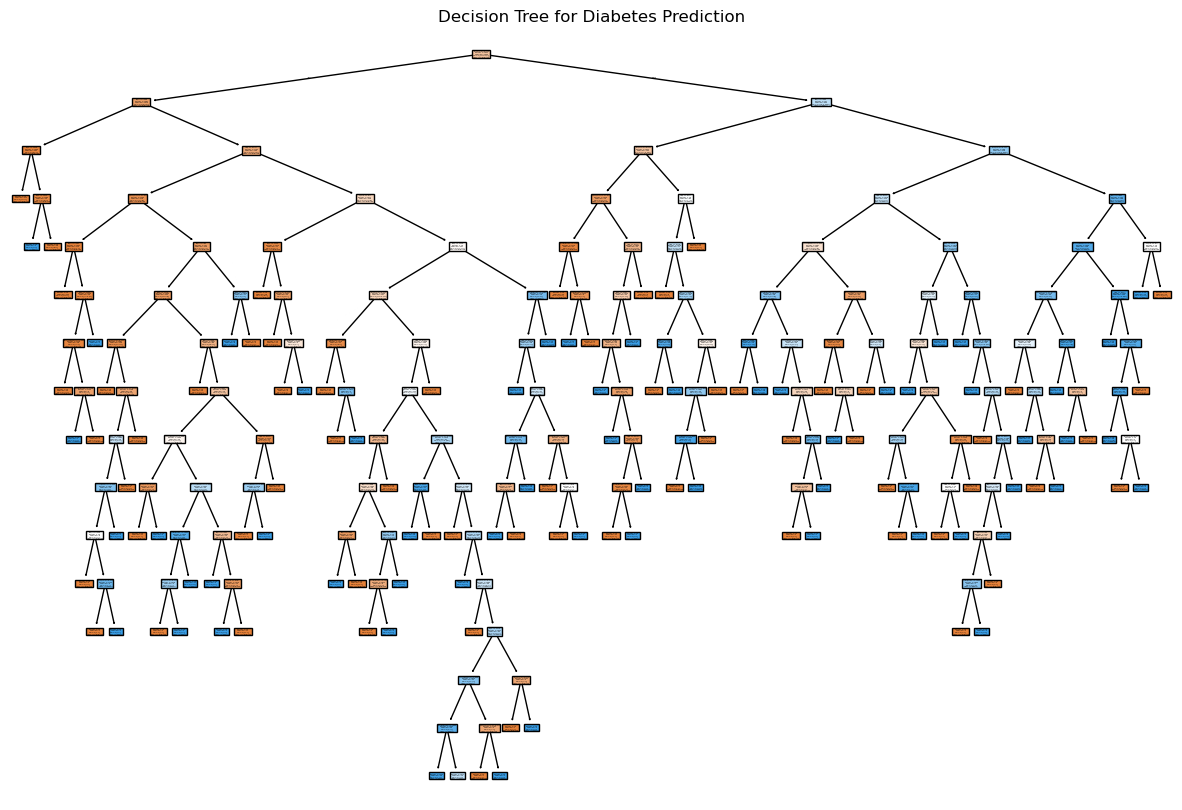

In [81]:
plt.figure(figsize=(15,10))
tree.plot_tree(best_dt_model,filled=True,feature_names=df.columns,class_names=['No Diabetes','Diabetes'])
plt.title('Decision Tree for Diabetes Prediction')
plt.show()

## 3) Random Forest Model:-

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_hyperparameter={'n_estimators':[50, 100, 200]}

In [85]:
rf_model=RandomForestClassifier() 
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
rf_grid_search=GridSearchCV(estimator=rf_model,param_grid=rf_hyperparameter,cv=5)
rf_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [87]:
rf_best_params=rf_grid_search.best_params_
print("Best Parameters:",rf_best_params)

Best Parameters: {'n_estimators': 100}


In [88]:
best_rf_model=rf_grid_search.best_estimator_
best_rf_model

RandomForestClassifier()

In [89]:
y_pred_rf=best_rf_model.predict(x_test)

In [90]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)*100
print("Accuracy of Random Forest Classifie:",accuracy_rf)

Accuracy of Random Forest Classifie: 99.0


In [91]:
report_rf=classification_report(y_test,y_pred_rf)
print("Classification Report of Random Forest Classifie:\n",report_rf)

Classification Report of Random Forest Classifie:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [92]:
matrix_rf=confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix of Random Forest Classifie:\n",matrix_rf)

Confusion Matrix of Random Forest Classifie:
 [[251   2]
 [  2 145]]


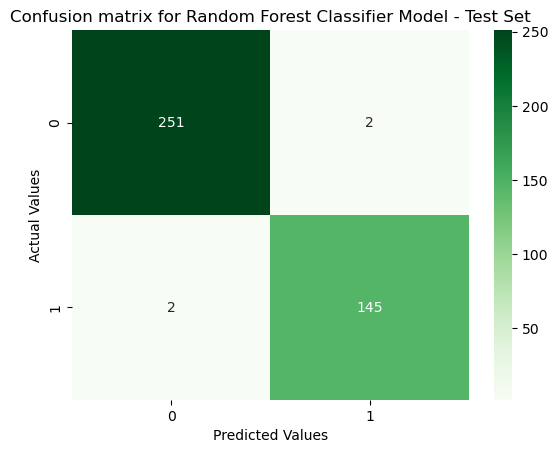

In [93]:
# Plotting the confusion matrix for Random Forest Classifier Model - Test Set
plt.figure()
p=sns.heatmap(matrix_rf, annot=True, cmap='Greens',fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [94]:
y_pred_rf_train=best_rf_model.predict(x_train)

In [95]:
accuracy_rf_train=accuracy_score(y_train,y_pred_rf_train)*100
print("Accuracy of Random Forest Classifie (Training_Set):",accuracy_rf_train)

Accuracy of Random Forest Classifie (Training_Set): 100.0


In [96]:
matrix_rf_train=confusion_matrix(y_train,y_pred_rf_train)
print("Confusion Matrix of Random Forest Classifie (Training_Set):\n",matrix_rf_train)

Confusion Matrix of Random Forest Classifie (Training_Set):
 [[1063    0]
 [   0  537]]


In [97]:
report_rf_train=classification_report(y_train,y_pred_rf_train)
print("Classification Report of Random Forest Classifie (Training_Set):\n",report_rf_train)

Classification Report of Random Forest Classifie (Training_Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      1.00      1.00       537

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



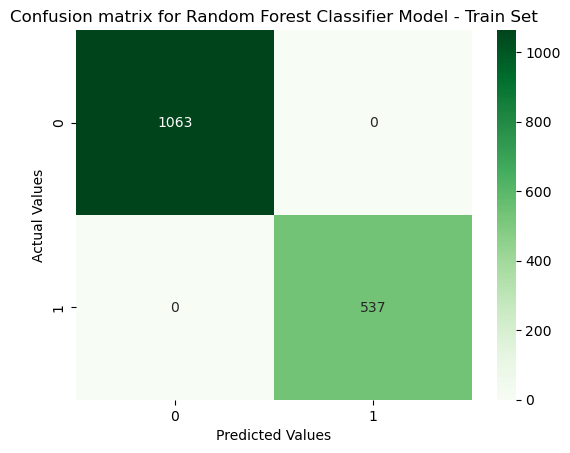

In [98]:
# Plotting the confusion matrix for Random Forest Classifier Model - Train Set
plt.figure()
p = sns.heatmap(matrix_rf_train, annot=True, cmap="Greens", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [99]:
Dict={'Model':['Logistic_Regression', 'Decision_Tree', 'Random_Forest'],
      'Best_Parameters':[lr_best_params, dt_best_params, rf_best_params],
      'Accuracy':[accuracy_lr, accuracy_dt, accuracy_rf]}

In [100]:
Data=pd.DataFrame(Dict,columns=['Model','Best_Parameters','Accuracy'])
Data

,Model,Best_Parameters,Accuracy
0,Logistic_Regression,{'C': 100},78.0
1,Decision_Tree,"{'criterion': 'entropy', 'max_depth': 15}",98.0
2,Random_Forest,{'n_estimators': 100},99.0


In [101]:
# Creating a pickle file for the classifier
import pickle
filename='Diabetes-Prediction-RFC-Model.pkl'
pickle.dump(best_rf_model,open(filename,'wb'))